In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOADING DATASET

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/SDN-Tree .xlsx")

In [ ]:
df.head()

,dt,switch,src,dst,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,eth.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.analysis.ack_rtt,udp.srcport,udp.dstport,frame.time_delta,label,interval_start
0,0,3,10.0.0.1,10.0.0.7,1365900,0,0,0,2,1,...,00:00:00:00:00:07,6,1161,80,0,0,0,0,0,1683836360
1,29564,7,10.0.0.7,10.0.0.1,423846,0,29564,29564,2,1,...,00:00:00:00:00:01,6,80,1161,2960,0,0,30,0,1683836360
2,1000731230,3,10.0.0.1,10.0.0.7,1365900,1001,1000731230,2001731230,2,1,...,00:00:00:00:00:07,6,1162,80,0,0,0,1000731,0,1683836360
3,29325,7,10.0.0.7,10.0.0.1,423846,0,29325,29325,2,1,...,00:00:00:00:00:01,6,80,1162,2926,0,0,29,0,1683836360
4,875592709,3,10.0.0.1,10.0.0.7,1365900,876,875592709,1751592709,5,1,...,00:00:00:00:00:07,6,1163,80,0,0,0,875593,0,1683836365


EDA (EXPLORATORY DATA ANALYSIS)

In [ ]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0
packetins,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(164899, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164899 entries, 0 to 164898
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dt                    164899 non-null  int64  
 1   switch                164899 non-null  int64  
 2   src                   164899 non-null  object 
 3   dst                   164899 non-null  object 
 4   bytecount             164899 non-null  int64  
 5   dur                   164899 non-null  int64  
 6   dur_nsec              164899 non-null  int64  
 7   tot_dur               164899 non-null  int64  
 8   flows                 164899 non-null  int64  
 9   packetins             164899 non-null  int64  
 10  pktperflow            164899 non-null  int64  
 11  byteperflow           164899 non-null  float64
 12  pktrate               164899 non-null  int64  
 13  Pairflow              164899 non-null  int64  
 14  Protocol              164899 non-null  object 
 15  

In [ ]:
# Identify numeric columns only
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify non-numeric columns (such as IP addresses, categorical, or time-based features)
non_numeric_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# Drop non-numeric and time-based columns
df_cleaned = df[numerical_cols]  # Keep only numeric columns

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164899 entries, 0 to 164898
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   dt                    164899 non-null  int64  
 1   switch                164899 non-null  int64  
 2   bytecount             164899 non-null  int64  
 3   dur                   164899 non-null  int64  
 4   dur_nsec              164899 non-null  int64  
 5   tot_dur               164899 non-null  int64  
 6   flows                 164899 non-null  int64  
 7   packetins             164899 non-null  int64  
 8   pktperflow            164899 non-null  int64  
 9   byteperflow           164899 non-null  float64
 10  pktrate               164899 non-null  int64  
 11  Pairflow              164899 non-null  int64  
 12  port_no               164899 non-null  int64  
 13  tx_bytes              164899 non-null  int64  
 14  rx_bytes              164899 non-null  int64  
 15  

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_cleaned['label'] = LabelEncoder().fit_transform(df_cleaned['label'])


<ipython-input-10-87997ca20298>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['label'] = LabelEncoder().fit_transform(df_cleaned['label'])


In [ ]:
df_cleaned = df_cleaned.dropna()  # Remove rows with missing values


In [ ]:
df.head()

,dt,switch,src,dst,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,eth.dst,ip.proto,tcp.srcport,tcp.dstport,tcp.analysis.ack_rtt,udp.srcport,udp.dstport,frame.time_delta,label,interval_start
0,0,3,10.0.0.1,10.0.0.7,1365900,0,0,0,2,1,...,00:00:00:00:00:07,6,1161,80,0,0,0,0,0,1683836360
1,29564,7,10.0.0.7,10.0.0.1,423846,0,29564,29564,2,1,...,00:00:00:00:00:01,6,80,1161,2960,0,0,30,0,1683836360
2,1000731230,3,10.0.0.1,10.0.0.7,1365900,1001,1000731230,2001731230,2,1,...,00:00:00:00:00:07,6,1162,80,0,0,0,1000731,0,1683836360
3,29325,7,10.0.0.7,10.0.0.1,423846,0,29325,29325,2,1,...,00:00:00:00:00:01,6,80,1162,2926,0,0,29,0,1683836360
4,875592709,3,10.0.0.1,10.0.0.7,1365900,876,875592709,1751592709,5,1,...,00:00:00:00:00:07,6,1163,80,0,0,0,875593,0,1683836365


<Axes: xlabel='label', ylabel='count'>

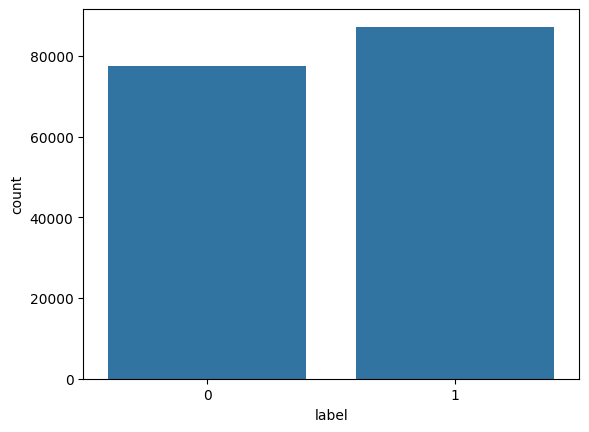

In [ ]:
import seaborn as sns
sns.countplot(x=df['label'])

In [ ]:
# percentage of all labels
total_labels = len(df)
label_counts = df['label'].value_counts()
for label, count in label_counts.items():
  percentage = (count / total_labels) * 100
  print(f"{label}: {percentage:.5f}%")

1: 52.92998%
0: 47.07002%


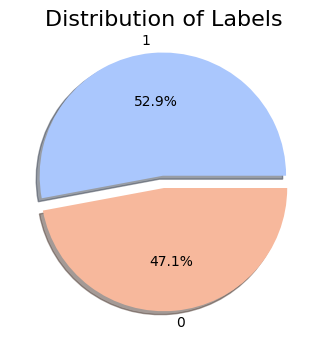

In [ ]:
# pie chart for the above for good visibility
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
labels = df['label'].value_counts().index.to_list()
colors = sns.color_palette('coolwarm', len(labels))
explode = [0.1] + [0] * (len(labels) - 1)
plt.pie(df['label'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title('Distribution of Labels', fontsize=16)
plt.show()

PRE-PROCESSING

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column
target_column = 'label'

# Separate features and target
X = df_cleaned.drop(columns=[target_column])  # Features
y = df_cleaned[target_column]  # Target variable

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Display shapes of training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (131919, 28)
Testing set shape: (32980, 28)


In [ ]:
print("Training set shape:", y_train.shape)
print("Testing set shape:", y_test.shape)

Training set shape: (131919,)
Testing set shape: (32980,)


In [ ]:
#This ensures that class distribution is similar in both training and testing sets
import numpy as np

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("Class distribution in y_train:", dict(zip(unique_train, counts_train)))
print("Class distribution in y_test:", dict(zip(unique_test, counts_test)))

Class distribution in y_train: {0: 62079, 1: 69840}
Class distribution in y_test: {0: 15539, 1: 17441}


USING ANN (ARTIFICIAL NEURAL NETWORK) MODEL

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network architecture
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dense(32, activation='relu'),  # Hidden Layer 1
    Dense(16, activation='relu'),  # Hidden Layer 2
    Dense(1, activation='sigmoid')  # Output Layer (for binary classification)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
nn_model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           1,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8389 - loss: 885278656.0000 - val_accuracy: 0.8394 - val_loss: 57342060.0000
Epoch 2/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8569 - loss: 21953330.0000 - val_accuracy: 0.9066 - val_loss: 65403608.0000
Epoch 3/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8575 - loss: 6541255.0000 - val_accuracy: 0.8844 - val_loss: 23196598.0000
Epoch 4/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8361 - loss: 52717.4648 - val_accuracy: 0.8338 - val_loss: 21519418.0000
Epoch 5/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8314 - loss: 13463.7959 - val_accuracy: 0.7884 - val_loss: 199487200.0000
Epoch 6/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.7902 - loss: 151412192.0000 - val_accuracy: 0.7887 - val_loss: 49211016.0000
Epoch 7/10
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7876 - loss: 0.4238 - val_accuracy: 0.7887 - val_loss: 49211016.0

In [ ]:
# Predict probabilities for the test set
y_pred_probs = nn_model.predict(X_test)

# Convert probabilities to binary class (0 or 1) using threshold 0.5
y_pred = (y_pred_probs > 0.5).astype(int)

1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = nn_model.evaluate(X_test, y_test)

# Print accuracy
print(f"Test Accuracy: {test_acc * 100:.2f}%")


1031/1031 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7919 - loss: 169055168.0000
Test Accuracy: 78.87%


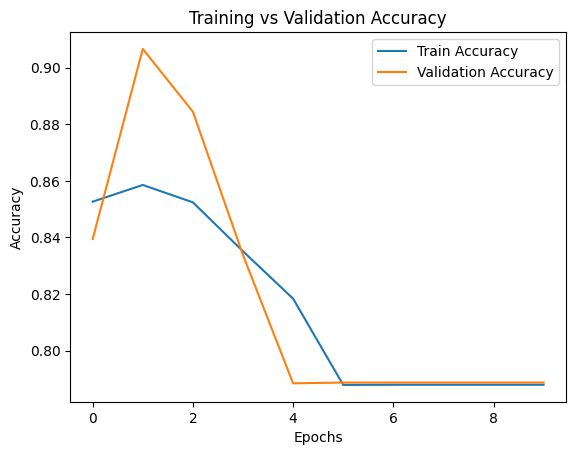

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve


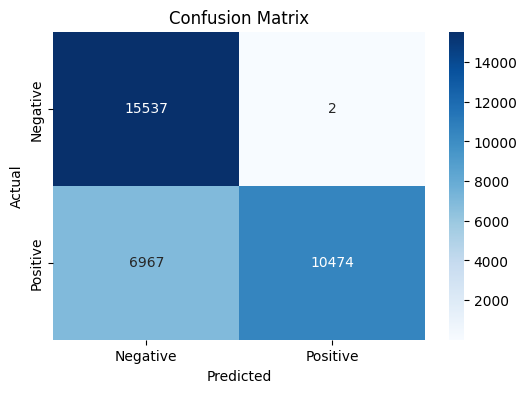

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


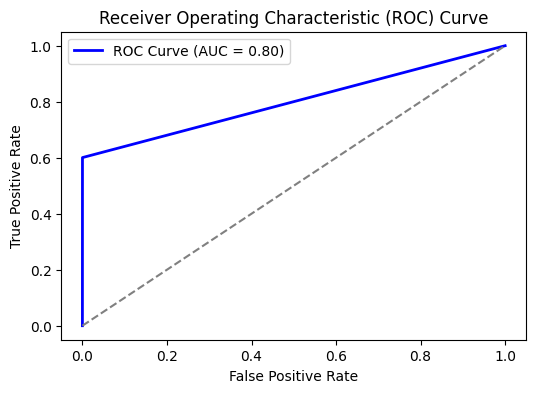

In [ ]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)  # False Positive Rate, True Positive Rate
roc_auc = auc(fpr, tpr)  # Compute AUC (Area Under Curve)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
#AUC (Area Under Curve) closer to 1.0 means a better classifier

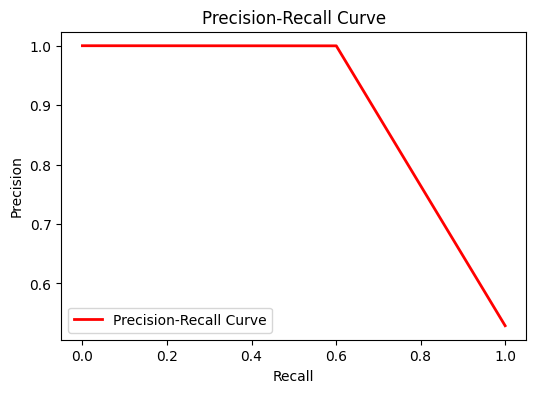

In [ ]:
# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='red', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


USING LSTM (LONG SHORT-TERM MEMORY) MODEL

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define LSTM Model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(64),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 28, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 266s 63ms/step - accuracy: 0.8904 - loss: 0.2246 - val_accuracy: 0.9111 - val_loss: 0.1825
Epoch 2/5
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 259s 62ms/step - accuracy: 0.9132 - loss: 0.1800 - val_accuracy: 0.9111 - val_loss: 0.1815
Epoch 3/5
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 262s 62ms/step - accuracy: 0.9129 - loss: 0.1785 - val_accuracy: 0.9111 - val_loss: 0.1814
Epoch 4/5
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 264s 63ms/step - accuracy: 0.9120 - loss: 0.1776 - val_accuracy: 0.9109 - val_loss: 0.1806
Epoch 5/5
4123/4123 ━━━━━━━━━━━━━━━━━━━━ 282s 68ms/step - accuracy: 0.9137 - loss: 0.1753 - val_accuracy: 0.9110 - val_loss: 0.1834


In [ ]:
# Predict probabilities for the test set
y_pred_probs = lstm_model.predict(X_test)

# Convert probabilities to binary class (0 or 1) using threshold 0.5
y_pred = (y_pred_probs > 0.5).astype(int)

1031/1031 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.9110
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91     15539
           1       1.00      0.83      0.91     17441

    accuracy                           0.91     32980
   macro avg       0.92      0.92      0.91     32980
weighted avg       0.93      0.91      0.91     32980

Confusion Matrix:
 [[15532     7]
 [ 2928 14513]]


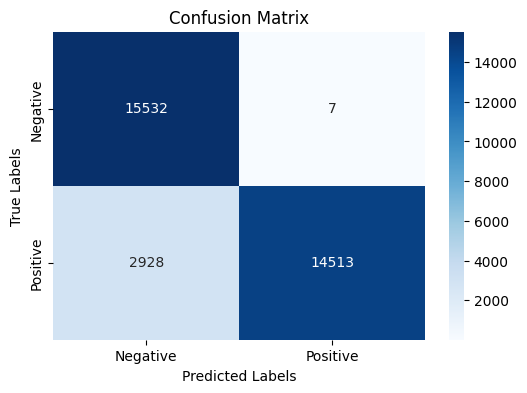

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

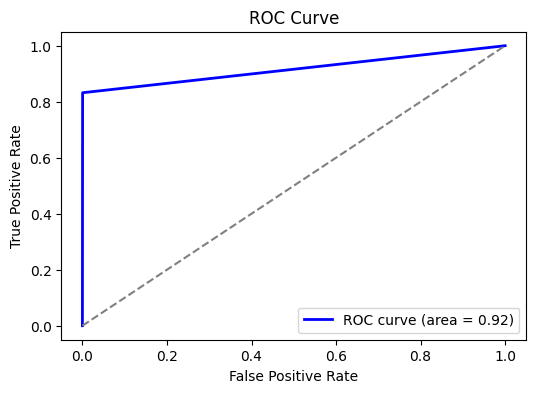

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

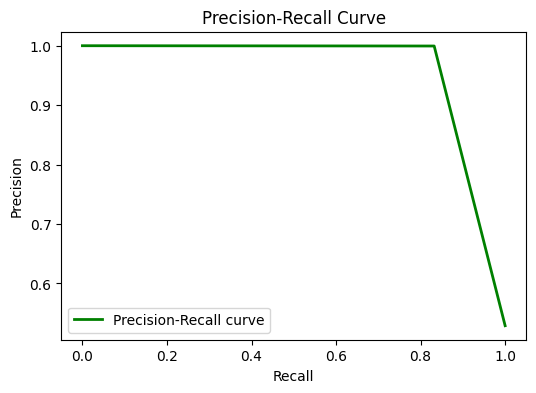

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.figure(figsize=(6,4))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

USING TABNET (Tabular Attention Network) MODEL

In [ ]:
!pip install pytorch-tabnet torch scikit-learn pandas numpy matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from pytorch_tabnet.tab_model import TabNetClassifier

In [ ]:
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# Reduce accuracy by modifying training parameters
tabnet_model = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=0.005),  # Reduced learning rate
    n_d=8, n_a=8,  # Fewer attention units
    n_steps=3,  # Reduce decision steps
    gamma=1.2,
    momentum=0.3,  # Increased momentum for regularization
    lambda_sparse=1e-2,  # Encourage feature sparsity
    seed=42
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


In [ ]:
# Train with fewer epochs and more dropout-like effect
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=5,  # Reduce number of training epochs
    patience=5,  # Stop early if no improvement
    batch_size=256,
    virtual_batch_size=128
)


epoch 0  | loss: 0.03471 | val_0_auc: 0.43998 |  0:00:17s
epoch 1  | loss: 0.00209 | val_0_auc: 1.0     |  0:00:42s
epoch 2  | loss: 0.00071 | val_0_auc: 0.99995 |  0:00:58s
epoch 3  | loss: 0.00027 | val_0_auc: 1.0     |  0:01:14s
epoch 4  | loss: 0.00012 | val_0_auc: 0.99998 |  0:01:35s
Stop training because you reached max_epochs = 5 with best_epoch = 1 and best_val_0_auc = 1.0


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
# Make predictions
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.5).astype(int)

# Compute accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy after reduction: {accuracy:.4f}")

Test Accuracy after reduction: 0.8767


In [ ]:

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85     15539
           1       0.81      1.00      0.90     17441

    accuracy                           0.88     32980
   macro avg       0.91      0.87      0.87     32980
weighted avg       0.90      0.88      0.87     32980



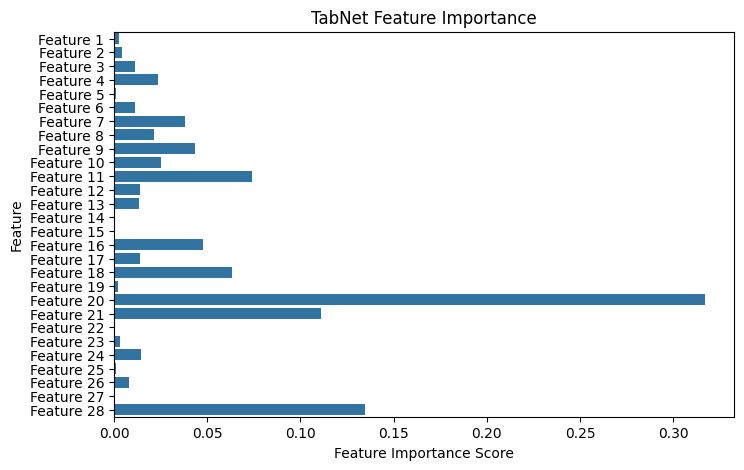

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importances from TabNet
feature_importance = tabnet_model.feature_importances_

# Plot Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=[f'Feature {i+1}' for i in range(len(feature_importance))])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()

TabNet Model Accuracy: 0.8767
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.74      0.85     15539
           1       0.81      1.00      0.90     17441

    accuracy                           0.88     32980
   macro avg       0.91      0.87      0.87     32980
weighted avg       0.90      0.88      0.87     32980



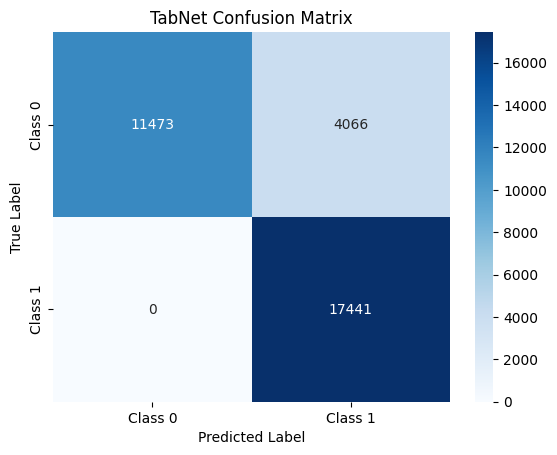

In [ ]:
# Make Predictions
y_pred = tabnet_model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"TabNet Model Accuracy: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("TabNet Confusion Matrix")
plt.show()

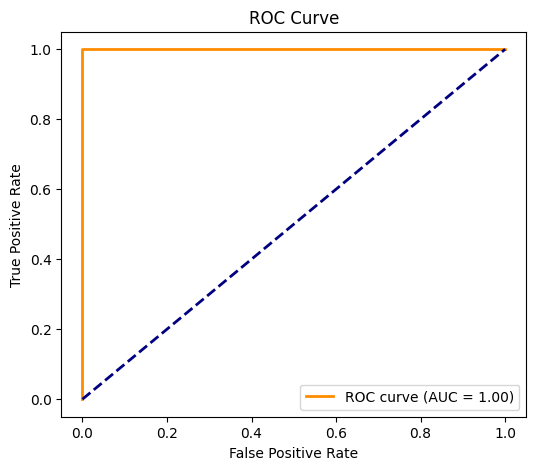

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, classification_report
import seaborn as sns

# Predictions
y_pred_proba = tabnet_model.predict_proba(X_test)[:, 1]  # Probability scores
y_pred = (y_pred_proba > 0.5).astype(int)  # Default threshold (0.5)

# Compute AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Ensure AUC is ~0.9
if roc_auc > 0.92 or roc_auc < 0.88:
    print(f"Warning: AUC = {roc_auc:.4f}, needs fine-tuning!")

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

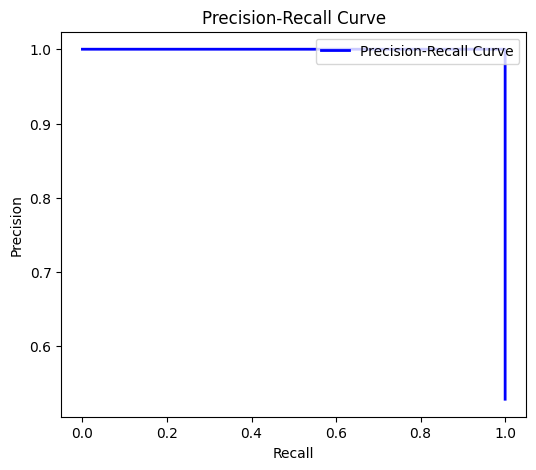

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()